# Δεδομένα Πειράματος και Διαλογή Εικόνων
## Ορισμός των μεταβλητών συστήματος 
1. Οι εικόνες βρίσκονται στο dir `/data/raw`
2. το notebook `01-data_access.ipynb` βρίσκεται στο `/notebooks`
3. οπότε για να έχουμε πρόσβαση πρέπει να μεταφερθούμε στο root project directory

### Δομή package 
- `src`
    - `data`
    - `features`
    - `models`
    - `visualization`
    
### Αρχικοποίηση Notebook
- καταχωρούμε αν δεν έχουμε ήδη στο σύστημα το directory του project
- δίνουμε πρόσβαση στο σύστημα για το πχ `C:\Users\plouk\Adiposer`
- Το σύστημα για την ώρα βρίσκεται στο `C:\Users\plouk\anaconda3\python.exe`

## Εικόνες για τη γενική ανατομία του λιπώδους ιστού
### Εξέλιξη της φαιoποίησης του λευκού λιπώδους ιστού σε διαφορετικά ποντίκια υπό κρύο περιβάλλον
Οι υποδόριες και σπλαχνικές αποθήκες τεμαχίστηκαν και τοποθετήθηκαν σε ένα πρότυπο ποντικιού για να δείξουν την τοποθεσία τους στο σώμα. 
Το ποντίκι στα αριστερά διατηρήθηκε σε θερμοκρασίες κοντά στη θερμο-ουδετερότητα (28℃ για 10 ημέρες), ενώ το ποντίκι στα δεξιά προσαρμόστηκε σε κρύο (6℃ για 10 ημέρες). Το πλύσιμο του λιπώδους οργάνου είναι οπτικά εμφανές στον εγκλωβισμένο ποντίκι. 
* Το λιπώδες όργανο αποτελείται από δυο υποδόριες αποθήκες: 
    - (Α) πρόσθια (βαθιά αυχενική, επιφανειακή αυχενική, ενδοκεφαλική, υποκεφαλική, αξιλο-θωρακική) 
    - (F) οπίσθια (ραχιαίος-οσφυϊκός, βουβωνικός, γλουτιαίος), 
    - και από αρκετές οπτικές αποθήκες: 
        - (Β) μεσοθωρακικό, 
        - (C) μεσεντερικό, 
        - (D) ρετρό-περιτοναϊκό και
        - (Ε) κοιλιακό-πυελικό (περινεναλικός, περιατοβαρικός, παραμετρικός, περικοκικός).

Ράβδος κλίμακας: 1 cm. Το λιπώδες όργανο των ποντικών Sv129 περιέχει τον επιπολασμό των καφέ λιποκυττάρων και δείχνει την πλαστικότητα μετά από κρύα έκθεση. 
![ανατομική εικόνα](img/giorgano.png)

### Περιοχές ενδιαφέροντος 
| WAT Location            | BAT Location |
| ------------------------- | ------------------------- |
| ![something](img/wat_location.jpg)  | ![something](img/bat_location.jpg) |

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path

'C:\\Users\\plouk\\Adiposer'

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob

from skimage.exposure import histogram
from skimage.util import img_as_ubyte

from src.features import mouse_detection
from src.data import initial_data_pick

src.data.initial_data_pick


In [6]:
infrared_images = [] # stores (238, 98) arrays etc
items = glob(module_path + '/data/raw/0h/Mouse1/IR_*')
for item in items:
    infrared_images.append(imread(fname=item, as_gray=True))
markerBack, markerBody = 70, 120
object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # stores (240, 160) arrays
items = glob(module_path + '/data/raw/0h/Mouse1/CSV_*')
for item in items:
    csv_files.append(initial_data_pick.CSV_fixer(item, fname='', save_dir=''))

thermals = [csv * mask  for (mask, csv) in zip(initial_masks, csv_files)]

new = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]

In [5]:
print(f'{object_images[0].shape} {len(mouse_locations)} {initial_masks[0].shape}' )

(220, 97) 36 (240, 160)


   (240, 160)


<AxesSubplot:title={'center':'Thermal Image'}>

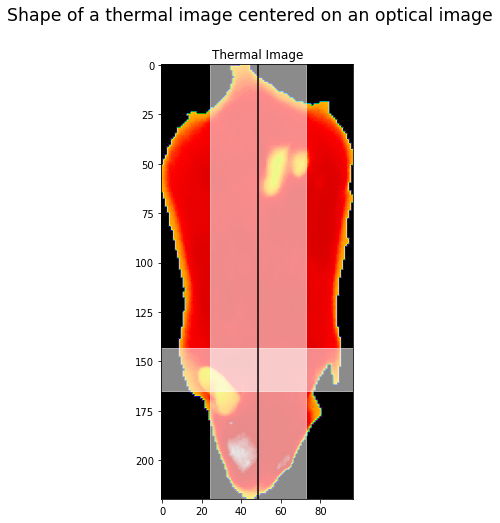

In [19]:
print(f'   {thermals[0].shape}')
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Shape of a thermal image centered on an optical image', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

ax0.imshow(X=new[0], cmap=plt.cm.nipy_spectral)
ax0.axvline(x=new[0].shape[1]/2, c='black')
#ax0.axvline(x=new[0].shape[1]/2, c='red')
ax0.axvspan(xmin=0.25*new[0].shape[1], xmax=0.75*new[0].shape[1], color='white', alpha=0.55)
ax0.axhspan(ymin=0.65*new[0].shape[0], ymax=0.75*new[0].shape[0], color='white', alpha=0.55)
#ax0.axhline(y=new[0].shape[0]/2 + infrared_images[0].shape[0], c='yellow')
#ax0.axhline(y=optical_images[0].shape[0]/2 - infrared_images[0].shape[0], c='green')
ax0.set_title(label='Thermal Image')
fig.add_subplot(ax0)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 30.86it/s]


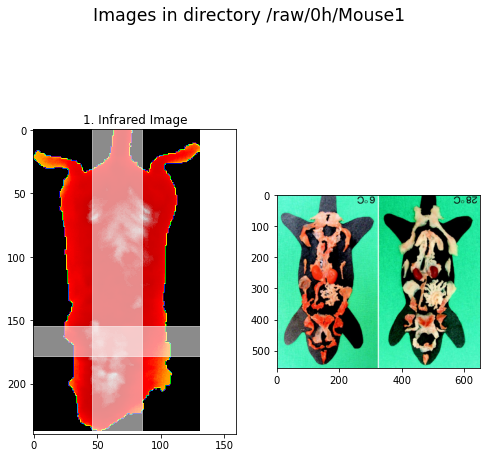

In [22]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Images in directory /raw/0h/Mouse1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])

camera = Camera(fig)
for image in tqdm(new):
    ax1.imshow(X=imread('img/tissues.png'))
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    ax0.set_title(label='1. Infrared Image')
    ax0.axvspan(xmin=0.35*image.shape[1], xmax=0.65*image.shape[1], color='white', alpha=0.55)
    ax0.axhspan(ymin=0.65*image.shape[0], ymax=0.75*image.shape[0], color='white', alpha=0.55)
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate()
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation